# Pump Example Notebook
This script shows basic I/O operations that can be performed with this toolkit, as well as some of the basic model and simulation visualization and analysis features.

This script runs these basic operations on the simple model defined in ex_pump.py.

In [1]:
import networkx as nx
import fmdtools.sim.propagate as propagate
from fmdtools import analyze as an
from ex_pump import *
from IPython.display import HTML

### Initial Model Checks
Before seeing how faults propagate, it's useful to see that the model structure is set up correctly and that the system performs as expected.

In [2]:
mdl = Pump()

One of the easiest ways to visualize this is by viewing the model in the repl, which shows thes states and modes of the component functions and flows.

In [3]:
mdl

Pump model at 0x192a5ccda00 
FUNCTIONS: 
import_ee ImportEE
- ImportEEState(effstate=1.0)
- ImportEEMode(mode=nominal, faults=set())
import_water ImportWater
- State()
- ImportWaterMode(mode=nominal, faults=set())
import_signal ImportSig
- State()
- ImportSigMode(mode=nominal, faults=set())
move_water MoveWat
- MoveWatStates(eff=1.0)
- MoveWatMode(mode=nominal, faults=set())
export_water ExportWater
- State()
- ExportWaterMode(mode=nominal, faults=set())
FLOWS: 
ee_1 Electricity flow: EEStates(current=1.0, voltage=1.0)
sig_1 Signal flow: SignalStates(power=1.0)
wat_1 Water flow: WaterStates(flowrate=1.0, pressure=1.0, area=1.0, level=1.0)
wat_2 Water flow: WaterStates(flowrate=1.0, pressure=1.0, area=1.0, level=1.0)

#### Model Structure Visualization

To check that the simulation structures are set up right, the ModelGraph class lets us visualize the function/flow relationships in the model. This helps us answer the questions:
   - are all functions on the graph?
   - are the functions connected with the correct flows?

In [4]:
from fmdtools.analyze.graph import ModelGraph

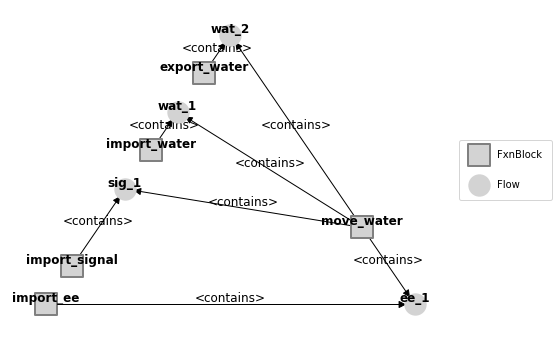

In [5]:
a=ModelGraph(mdl)
fig, ax = a.draw(figsize=(8,6))

Note that a variety of different Classes can be used for model structure visualization, inlcluding `ModelFxnGraph`, `ModelFlowGraph`, and `ModelTypeGraph`. This is further explained in `examples/rover/Model_Structure_Visualization_Tutorial.ipynb`

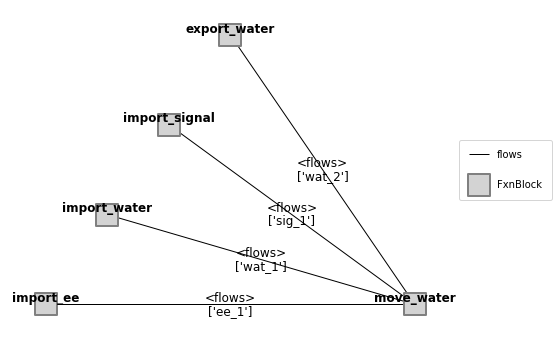

In [6]:
from fmdtools.analyze.graph import ModelFxnGraph
b=ModelFxnGraph(mdl)
fig = b.draw(figsize=(8,6))

#### Nominal Run

The next code runs the model in the nominal state to check to see that the model has been defined correctly.
This helps us verify:
   - if any faults occur in the nominal scenario
   - if the progression of states proceeds as desired over time.

The following code runs the model with no faults to let us do that. The inputs are:
- mdl (the model we imported at the start of the script)
- track (which model aspects to track)
- desired_result (str/list/dict describing what to return in result)
- **kwargs (see docs)

The outputs are:
- result (a `Result` object defined in `analyze.result`)
- mdlhist (a `History` object defined in `analyze.result`)

Both `Result` and `History` have a number of methods that can be readily used to process and analyze simulation results. See:
- [Result documentation](https://nasa.github.io/fmdtools/docs/fmdtools.analyze.html#fmdtools.analyze.result.Result)
- [History documentation](https://nasa.github.io/fmdtools/docs/fmdtools.analyze.html#fmdtools.analyze.result.History)

Many different properties can be requested given the `desired_result` argument ([see full list here](https://nasa.github.io/fmdtools/docs/fmdtools.sim.html#fmdtools.sim.propagate.sim_kwargs)). In this case, we pass a dict with key `graph` and a value `ModelGraph` specifying that we want it to give us a graph view of the `Model`.

In [7]:
result, mdlhist=propagate.nominal(mdl, track='all', desired_result={'graph':ModelGraph})

Here we can see where it is in the Result:

In [8]:
result

graph: <fmdtools.analyze.graph.ModelGraph object at 0x00000192A65F4EE0>

In [9]:
result.graph

With these results, we can now plot the graph of results resgraph using:

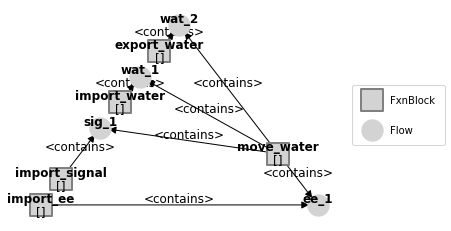

In [10]:
fig = result.graph.draw(figsize=(6,4))

As can be seen, this gives a graphical representation of the functional model with the various flows. Since all of the functions are *grey*, no faults were accidentally introduced in this run.


A model history is additionally returned given our specified tracking options. If none are provided, the `default_track` variable in the `Model` is used (which in this case is set to `all`). See below:

In [11]:
mdlhist

i.finished:                    array(56)
i.on:                          array(56)
fxns.import_ee.s.effstate:     array(56)
fxns.import_ee.m.faults.no_v:  array(56)
fxns.import_ee.m.faults.inf_v: array(56)
fxns.import_ee.m.mode:         array(56)
fxns.import_water.m.faults.no_wat: array(56)
fxns.import_water.m.mode:      array(56)
fxns.import_signal.m.faults.no_sig: array(56)
fxns.import_signal.m.mode:     array(56)
fxns.move_water.i.over_pressure: array(56)
fxns.move_water.s.eff:         array(56)
fxns.move_water.m.faults.mech_break: array(56)
fxns.move_water.m.faults.short: array(56)
fxns.move_water.m.mode:        array(56)
fxns.move_water.t.pressure_limit.time: array(56)
fxns.move_water.t.pressure_limit.mode: array(56)
fxns.export_water.m.faults.block: array(56)
fxns.export_water.m.mode:      array(56)
flows.ee_1.s.current:          array(56)
flows.ee_1.s.voltage:          array(56)
flows.sig_1.s.power:           array(56)
flows.wat_1.s.flowrate:        array(56)
flows.wat_1.s.pressu

In [12]:
mdlhist.fxns.move_water.m.mode

array(['nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal'], dtype='<U10')

We can further look at the states of the model using `an.plot.hist`:

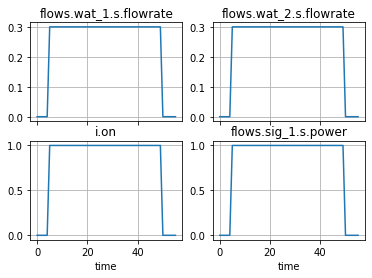

In [13]:
fig, ax = an.plot.hist(mdlhist ,'flows.wat_1.s.flowrate', 
                               'flows.wat_2.s.flowrate', 
                               'i.on', 
                               'flows.sig_1.s.power')

As we can see, the state of these flows does exactly what we would expect--when the switch turns on at $t=5$, the pump switches on and there is a flow of water in and out of the model.

### History
If we want to see this data in tabular form, we can use `fp.tabulate.hist()`:

In [14]:
nominal_histtable = mdlhist.as_table()
nominal_histtable[:10] #only displaying 10 

,i.finished,i.on,fxns.import_ee.s.effstate,fxns.import_ee.m.faults.no_v,fxns.import_ee.m.faults.inf_v,fxns.import_ee.m.mode,fxns.import_water.m.faults.no_wat,fxns.import_water.m.mode,fxns.import_signal.m.faults.no_sig,fxns.import_signal.m.mode,...,flows.sig_1.s.power,flows.wat_1.s.flowrate,flows.wat_1.s.pressure,flows.wat_1.s.area,flows.wat_1.s.level,flows.wat_2.s.flowrate,flows.wat_2.s.pressure,flows.wat_2.s.area,flows.wat_2.s.level,time
0,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
2,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0
3,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0
4,False,False,1.0,False,False,nominal,False,nominal,False,nominal,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0
5,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,5.0
6,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,6.0
7,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,7.0
8,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,8.0
9,False,True,1.0,False,False,nominal,False,nominal,False,nominal,...,1.0,0.3,10.0,1.0,1.0,0.3,10.0,1.0,1.0,9.0


This table is a pandas dataframe. We can save this dataframe to a .csv using `nominal_histtable.to_csv("filename.csv")`

### Propagating and Viewing Results for Individual Faults
It is often necessary to see how the system reacts to individual faults. This can gives us better understanding of how the system behaves under individual faults and can let us iterate with the model better.

The following code runs the model with a single fault in a single function. In this case, we are initiating a short in the 'Move Water' function at 10 hours into the system's operation.

The inputs are:
- `mdl` (the model we imported at the start of the script)
- `function` (the function the fault we're interested in propagating occurs in)
- `faultmode` (the fault to initiate)
- `time` (the time when the fault is initiated)
- **kwargs )

The outputs are (the same as propogate.nominal):
- `results` (a dictionary corresponding to `desired_result`)
- `mdlhist` (the states of the model over time)

In [15]:
endresults, mdlhist=propagate.one_fault(mdl, 'move_water', 'short', time=10, 
                                        desired_result=['graph','endclass','endfaults'])

Now mdlhist has double the number of entries--those corresponding to the nominal and faulty scenarios.

In [16]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.time:                  array(56)
faulty.i.finished:             array(56)
faulty.i.on:                   array(56)
faulty.flows.ee_1.s.current:   array(56)
faulty.flows.wat_2.s.flowrate: array(56)
faulty.time:                   array(56)

`History.get_degraded_hist` compares the results over time so we can see what functions and flows were degraded over time. We can then use the summary to view a list of the functions and flows that were impacted over time.

In [17]:
deghist = mdlhist.get_degraded_hist(*mdl.fxns, *mdl.flows)

In [18]:
deghist

ee_1:                          array(56)
wat_2:                         array(56)
total:                         array(56)
time:                          array(56)

In [19]:
deghist.as_table()

,ee_1,wat_2,total,time
0,1,1,0,0.0
1,1,1,0,1.0
2,1,1,0,2.0
3,1,1,0,3.0
4,1,1,0,4.0
5,1,1,0,5.0
6,1,1,0,6.0
7,1,1,0,7.0
8,1,1,0,8.0
9,1,1,0,9.0


`endresults` however, keeps the endresult for the faulty scenario alone, as shown:

In [20]:
endresults

endclass.rate:                   0.00055
endclass.cost:        29000.000000000007
endclass.expected cost: 1595000.0000000005
endfaults: {'import_ee': ['no_v'], 'move_water': ['short']}
faultprops: {'import_ee': {'no_v': Fault(dist=0.8, oppvect=[0, 1, 0], rcost=10000, probtype='rate', units='hr')}, 'move_water': {'short': Fault(dist=1.0, oppvect=[1.5, 1.0, 1.0], rcost=10000, probtype='rate', units='hr')}}
graph: <fmdtools.analyze.graph.ModelGraph object at 0x00000192A6879520>

However, the graph view now has information about degradations between the faulty and nominal runs, along with fault information:

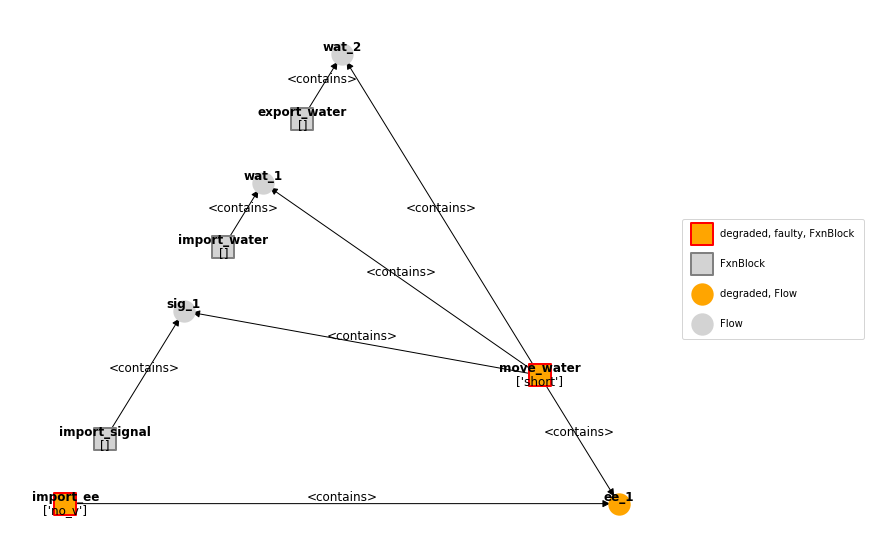

In [21]:
fig = endresults.graph.draw()

In [22]:
endresults.graph.g.nodes['move_water']

{'bipartite': 0,
 'label': 'FxnBlock',
 'states': {'eff': 0.0},
 'faults': ['short'],
 'degraded': True,
 'faulty': True}

As can be seen, at the final t, the short causes a degraded flow of electricity as well as a fault in the Import EE function. 

**However**, we would imagine that the short would cause the water to stop moving also--so why is it not red?

The answer is that by default the degradations shown in the graph are shown at the **final time**, which is the same both for the failed model and the nominal model, since the pump is switched "off." In this case we might be more interested in looking at how the graph looks in operation, rather than at the end.

We can do that that in two ways:
- by specifying a different time to fetch the graph from (e.g., `desired_result={10:'graph'}`, or
- by reconstructing the based on the history of the plot, as shown below:

In [23]:
mg = ModelGraph(mdl)

To do this, we first need to track more states than have been specified to track in the model. The easiest way to do this is to set `track='all'`.

In [24]:
endresults, mdlhist_full=propagate.one_fault(mdl, 'move_water', 'short', time=10, track='all',
                                        desired_result=['graph','endclass','endfaults'])

We can then plot the state at any time in the history using `mg.draw_from`.

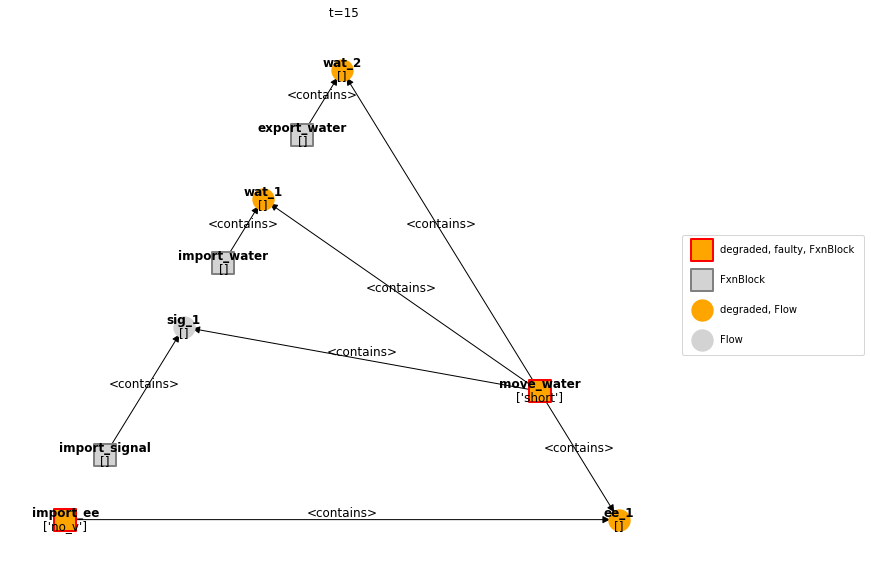

In [25]:
fig, ax = mg.draw_from(15, mdlhist_full)

As shown, this version has the degradation of the water, since at this time the off-nominal state is different from the nominal (no flow).

We can view an animation over time using:

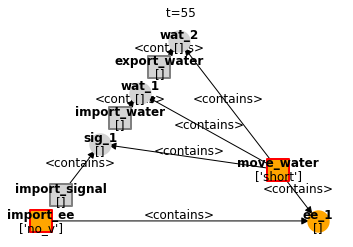

In [26]:
from IPython.display import HTML
ani = mg.animate_from(mdlhist_full)
HTML(ani.to_jshtml())

Note that if only a partial history is given, only partial results will be displayed (see below).

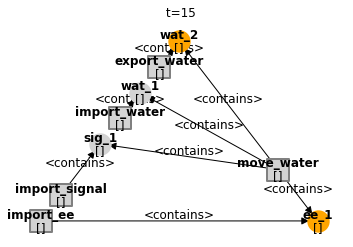

In [27]:
fig, ax = mg.draw_from(15, mdlhist, figsize=(6,4), withlegend=False)

We can also plot the states of this against the nominal run using:

In [28]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.time:                  array(56)
faulty.i.finished:             array(56)
faulty.i.on:                   array(56)
faulty.flows.ee_1.s.current:   array(56)
faulty.flows.wat_2.s.flowrate: array(56)
faulty.time:                   array(56)

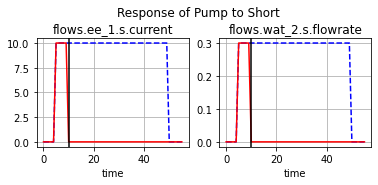

In [29]:
fig, axs = an.plot.hist(mdlhist, 'flows.ee_1.s.current', 'flows.wat_2.s.flowrate', 
                        title="Response of Pump to Short", time_slice=10, legend_loc=False, title_padding=0.1)

As you can see, the system begins nominal until the fault is injected at $t=10$. At this moment, not only are the electrical energy flows degraded, the flow of water is degraded also. However, at $t=55$ when the system is supposed to be turned off, this flow of water is no longer "degraded" because it is in the same state as the nominal system.

We can look at a table of to see more precisely what happened (and export, if needed). Note that we need to give the plotting function the mode ('short') and the time for it to plot properly.

In [30]:
mdlhist.as_table()

,nominal.i.finished,nominal.i.on,nominal.flows.ee_1.s.current,nominal.flows.wat_2.s.flowrate,nominal.time,faulty.i.finished,faulty.i.on,faulty.flows.ee_1.s.current,faulty.flows.wat_2.s.flowrate,faulty.time
0,False,False,0.0,0.0,0.0,False,False,0.0,0.0,0.0
1,False,False,0.0,0.0,1.0,False,False,0.0,0.0,1.0
2,False,False,0.0,0.0,2.0,False,False,0.0,0.0,2.0
3,False,False,0.0,0.0,3.0,False,False,0.0,0.0,3.0
4,False,False,0.0,0.0,4.0,False,False,0.0,0.0,4.0
5,False,True,10.0,0.3,5.0,False,True,10.0,0.3,5.0
6,False,True,10.0,0.3,6.0,False,True,10.0,0.3,6.0
7,False,True,10.0,0.3,7.0,False,True,10.0,0.3,7.0
8,False,True,10.0,0.3,8.0,False,True,10.0,0.3,8.0
9,False,True,10.0,0.3,9.0,False,True,10.0,0.3,9.0


Here we can see that the short dropped the voltage to zero, (this was because an open circuit resulted in the Import EE function), causing the water to stop flowing. Below, we use the processed model history to show the faults and *degradation* of states over time. In this case, 1 means nominal while 0 means degraded.

In [31]:
deghist = mdlhist_full.get_degraded_hist(*mdl.fxns, *mdl.flows)

In [32]:
deghist.as_table()[:20]

,import_ee,import_water,import_signal,move_water,export_water,ee_1,sig_1,wat_1,wat_2,total,time
0,1,1,1,1,1,1,1,1,1,0,0.0
1,1,1,1,1,1,1,1,1,1,0,1.0
2,1,1,1,1,1,1,1,1,1,0,2.0
3,1,1,1,1,1,1,1,1,1,0,3.0
4,1,1,1,1,1,1,1,1,1,0,4.0
5,1,1,1,1,1,1,1,1,1,0,5.0
6,1,1,1,1,1,1,1,1,1,0,6.0
7,1,1,1,1,1,1,1,1,1,0,7.0
8,1,1,1,1,1,1,1,1,1,0,8.0
9,1,1,1,1,1,1,1,1,1,0,9.0


We can also look at the faults over time...

In [33]:
faulthist = mdlhist_full.get_faulty_hist(*mdl.fxns)
faulthist.as_table()[0:20]

,import_ee,import_water,import_signal,move_water,export_water,total,time
0,False,False,False,False,False,0,0.0
1,False,False,False,False,False,0,1.0
2,False,False,False,False,False,0,2.0
3,False,False,False,False,False,0,3.0
4,False,False,False,False,False,0,4.0
5,False,False,False,False,False,0,5.0
6,False,False,False,False,False,0,6.0
7,False,False,False,False,False,0,7.0
8,False,False,False,False,False,0,8.0
9,False,False,False,False,False,0,9.0


We can also look at statistics of degradation over time using:

In [34]:
summ = mdlhist_full.get_fault_degradation_summary(*mdl.fxns, *mdl.flows)
summ.faulty

['import_ee', 'move_water']

In [35]:
summ.degraded

['import_ee', 'move_water', 'ee_1', 'wat_1', 'wat_2']

#### Blockage Fault

We can also look at other faults. The results below are for a blockage of the pipe. In this case we're only interested in the effect on the water going through, so only those flows are tracked.

In [36]:
endresults2, mdlhist2=propagate.one_fault(mdl, 'export_water', 'block', 
                                          time=10, desired_result=['endclass', 'graph', 'endfaults'])
summ = mdlhist_full.get_fault_degradation_summary(*mdl.fxns, *mdl.flows)

In [37]:
summ.faulty

['import_ee', 'move_water']

In [38]:
summ.degraded

['import_ee', 'move_water', 'ee_1', 'wat_1', 'wat_2']

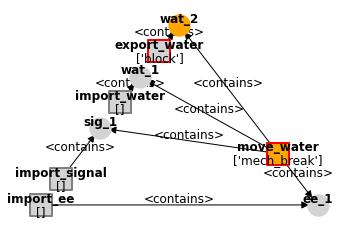

In [39]:
fig, ax = endresults2.graph.draw(figsize=(6,4), withlegend=False)

In [40]:
mdlhist

nominal.i.finished:            array(56)
nominal.i.on:                  array(56)
nominal.flows.ee_1.s.current:  array(56)
nominal.flows.wat_2.s.flowrate: array(56)
nominal.time:                  array(56)
faulty.i.finished:             array(56)
faulty.i.on:                   array(56)
faulty.flows.ee_1.s.current:   array(56)
faulty.flows.wat_2.s.flowrate: array(56)
faulty.time:                   array(56)

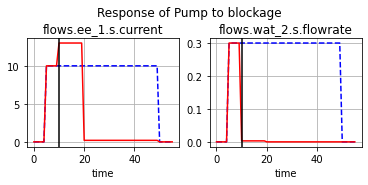

In [41]:
fig, axs = an.plot.hist(mdlhist2, 'flows.ee_1.s.current', 'flows.wat_2.s.flowrate',
                            title = 'Response of Pump to blockage', time_slice=10, legend_loc=False, title_padding=0.1)

### Visualization of resilience metrics
We can also use the processed time history to now make visualizations of the resilience of the system over time. 

Here we calculate the percent time the simulation was decraded over the simulation interval:

In [42]:
deghist = mdlhist_full.get_degraded_hist(*mdl.fxns, *mdl.flows)
exp = deghist.get_metrics()

In [43]:
exp

import_ee:           0.17857142857142858
import_water:                        1.0
import_signal:                       1.0
move_water:          0.17857142857142858
export_water:                        1.0
ee_1:                0.17857142857142858
sig_1:                               1.0
wat_1:                0.2857142857142857
wat_2:                0.2857142857142857
total:                 3.892857142857143
time:                               27.5

These metrics (and others like them) can then be overlayed as a heatmap using `set_heatmap`.

(<Figure size 864x720 with 1 Axes>, <AxesSubplot:>)

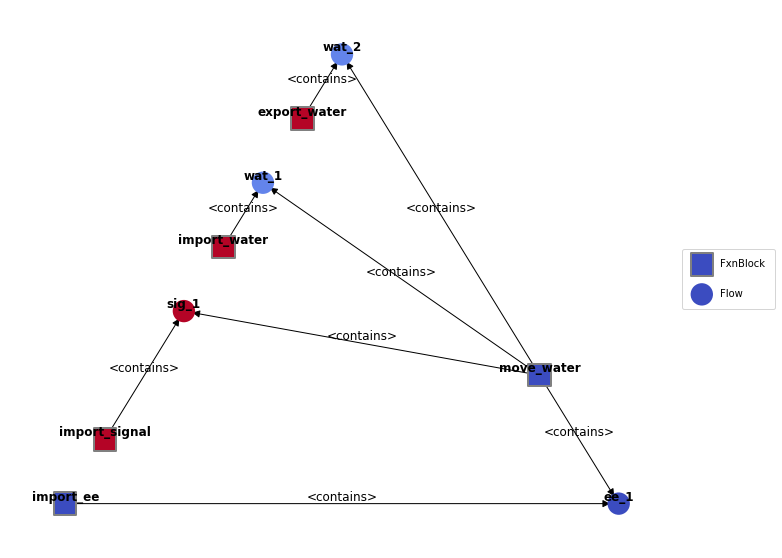

In [44]:
mg = ModelGraph(mdl)
mg.set_heatmap(exp)
mg.draw()

Network metrics can also be overlaid on the graphs:

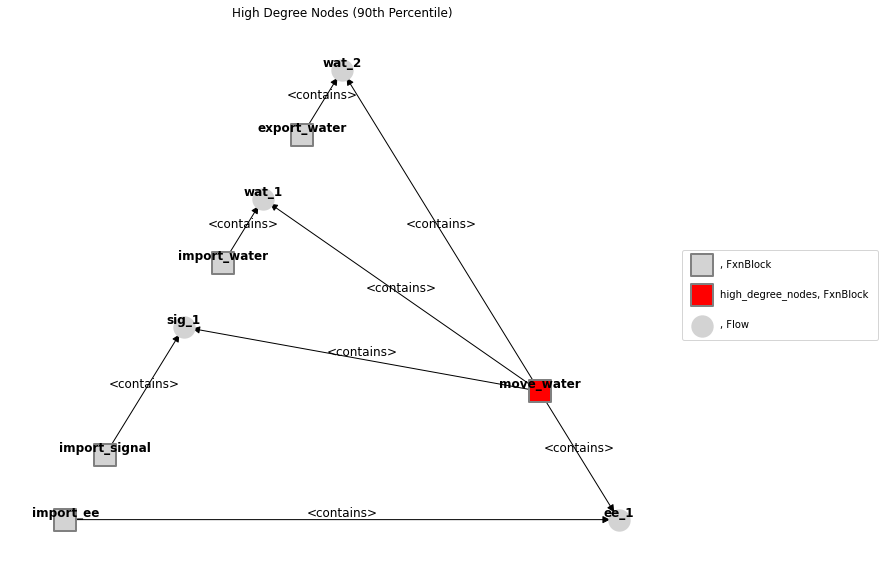

In [45]:
mg = ModelGraph(mdl)
fig, ax = mg.plot_high_degree_nodes()

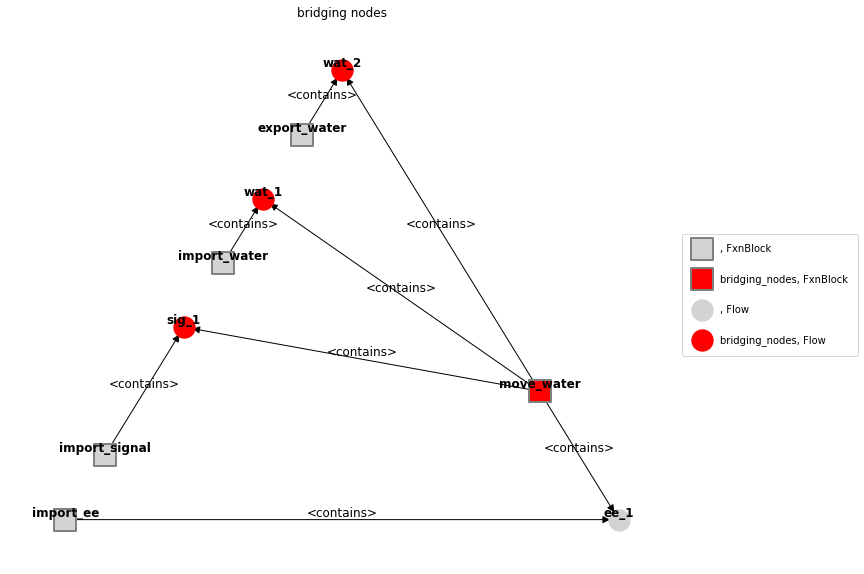

In [46]:
mg = ModelGraph(mdl)
fig, ax = mg.plot_bridging_nodes()

### Running a List of Faults
Finally, to get the results of all of the single-fault scenarios defined in the model, we can run them all at once using the `single_faults()` function. Note that this will propagate faults based on the times vector put in the model, e.g. if mdl.times=[0,3,15,55], it will propogate the faults at the begining, end, and at t=15 and t=15. This function only takes in the model mdl and outputs two similar kinds of output--resultsdict (the results in a python dictionary) and resultstab (the results in a nice tabular form). 

Note that the rates provide for this table do not use the opportunity vector information, instead using the assumption that the fault scenario has the rate provided over the entire simulation.

See below:

In [47]:
endclasses, mdlhists=propagate.single_faults(mdl, staged=True, track="all")

SCENARIOS COMPLETE:   0%|          | 0/21 [00:00<?, ?it/s]

SCENARIOS COMPLETE:  33%|███▎      | 7/21 [00:00<00:00, 65.60it/s]

SCENARIOS COMPLETE:  90%|█████████ | 19/21 [00:00<00:00, 94.08it/s]

SCENARIOS COMPLETE: 100%|██████████| 21/21 [00:00<00:00, 95.19it/s]

We can visualize the metrics for each scenario using `Result.create_simple_fmea`

In [48]:
endclasses.create_simple_fmea()

,rate,cost,expected cost
move_water_mech_break_t20,0.000330,11750.0,387750.0
import_ee_no_v_t20,0.000440,16750.0,737000.0
move_water_short_t0,0.000550,30125.0,1656875.0
import_water_no_wat_t20,0.000550,7750.0,426250.0
import_ee_inf_v_t20,0.000110,21750.0,239250.0
import_ee_no_v_t55,0.000440,10000.0,440000.0
import_ee_inf_v_t55,0.000110,5000.0,55000.0
import_ee_inf_v_t0,0.000110,25125.0,276375.0
import_signal_no_sig_t55,0.000055,10000.0,55000.0
move_water_mech_break_t0,0.000330,15125.0,499125.0


We can see corresponding degradations using `tabulate.result_summary.fmea()`

In [49]:
fullfmea = an.tabulate.result_summary_fmea(endclasses, mdlhists, *mdl.fxns, *mdl.flows)
fullfmea[:10]

,degraded,faulty,rate,cost,expected cost
move_water_mech_break_t20,"['move_water', 'ee_1', 'wat_1', 'wat_2']",['move_water'],0.00033,11750.0,387750.0
import_ee_no_v_t20,"['import_ee', 'ee_1', 'wat_1', 'wat_2']",['import_ee'],0.00044,16750.0,737000.0
move_water_short_t0,"['import_ee', 'move_water', 'ee_1', 'wat_1', '...","['import_ee', 'move_water']",0.00055,30125.0,1656875.0
import_water_no_wat_t20,"['import_water', 'ee_1', 'wat_1', 'wat_2']",['import_water'],0.00055,7750.0,426250.0
import_ee_inf_v_t20,"['import_ee', 'ee_1', 'wat_1', 'wat_2']",['import_ee'],0.00011,21750.0,239250.0
import_ee_no_v_t55,"['import_ee', 'ee_1']",['import_ee'],0.00044,10000.0,440000.0
import_ee_inf_v_t55,"['import_ee', 'ee_1']",['import_ee'],0.00011,5000.0,55000.0
import_ee_inf_v_t0,"['import_ee', 'ee_1', 'wat_1', 'wat_2']",['import_ee'],0.00011,25125.0,276375.0
import_signal_no_sig_t55,['import_signal'],['import_signal'],0.000055,10000.0,55000.0
move_water_mech_break_t0,"['move_water', 'ee_1', 'wat_1', 'wat_2']",['move_water'],0.00033,15125.0,499125.0


### Running a Fault Sampling Approach
Note that only gives accurate results for costs and fault responses--in order to get an accurate idea of *expected cost*, we instead run an Approach, which develops an underlying probability model for faults. See below.

In [50]:
app = SampleApproach(mdl) #using default parameters--note there are a variety of options for this appraoch

In [51]:
endclasses, mdlhists=propagate.approach(mdl, app, staged=True, track="all")
simplefmea = endclasses.create_simple_fmea() #note the costs are the same, but the rates and expected costs are not
simplefmea[:5]

SCENARIOS COMPLETE:   0%|          | 0/17 [00:00<?, ?it/s]

SCENARIOS COMPLETE:  59%|█████▉    | 10/17 [00:00<00:00, 89.52it/s]

SCENARIOS COMPLETE: 100%|██████████| 17/17 [00:00<00:00, 99.68it/s]

,rate,cost,expected cost
import_signal_no_sig_t27p0,0.000013,8650.0,11121.428571
move_water_short_t2p0,0.000021,30125.0,64553.571429
move_water_mech_break_t52p0,0.000003,5000.0,1285.714286
import_ee_no_v_t27p0,0.000360,15175.0,546300.000000
move_water_short_t27p0,0.000129,25175.0,323678.571429


We can now summarize the risks of faults over the operational phases and overall.

In [52]:
phasefmea = an.tabulate.phasefmea(endclasses, app)
phasefmea

rate  expected cost  \
(import_ee, inf_v)       (global, on)     0.000090  181575.000000   
(import_ee, no_v)        (global, on)     0.000360  546300.000000   
(move_water, short)      (global, start)  0.000021   64553.571429   
                         (global, on)     0.000129  323678.571429   
(import_signal, no_sig)  (global, start)  0.000002    4312.500000   
(export_water, block)    (global, start)  0.000021   43076.785714   
                         (global, on)     0.000129  194817.857143   
(move_water, mech_break) (global, start)  0.000002    3241.071429   
(import_water, no_wat)   (global, start)  0.000017   18541.666667   
(move_water, mech_break) (global, on)     0.000231  235478.571429   
(import_signal, no_sig)  (global, end)    0.000002    1714.285714   
(move_water, short)      (global, end)    0.000017   17142.857143   
(import_signal, no_sig)  (global, on)     0.000013   11121.428571   
(import_water, no_wat)   (global, on)     0.000150   92625.000000   
(move_water, mech_break) (global, end)    0.000003    1285.714286   
(export_water, block)    (global, end)    0.000017    8571.428571   
(import_water, no_wat)   (global, end)    0.000020    2000.000000   

                                                  cost  
(import_ee, inf_v)       (global, on)     20175.000000  
(import_ee, no_v)        (global, on)     15175.000000  
(move_water, short)      (global, start)  10041.666667  
                         (global, on)      8391.666667  
(import_signal, no_sig)  (global, start)   6708.333333  
(export_water, block)    (global, start)   6700.833333  
                         (global, on)      5050.833333  
(move_water, mech_break) (global, start)   5041.666667  
(import_water, no_wat)   (global, start)   3708.333333  
(move_water, mech_break) (global, on)      3391.666667  
(import_signal, no_sig)  (global, end)     3333.333333  
(move_water, short)      (global, end)     3333.333333  
(import_signal, no_sig)  (global, on)      2883.333333  
(import_water, no_wat)   (global, on)      2058.333333  
(move_water, mech_break) (global, end)     1666.666667  
(export_water, block)    (global, end)     1666.666667  
(import_water, no_wat)   (global, end)      333.333333

In [53]:
summfmea = an.tabulate.summfmea(endclasses, app)
summfmea

rate  expected cost          cost
move_water    short       0.000167  405375.000000  21766.666667
import_ee     inf_v       0.000090  181575.000000  20175.000000
              no_v        0.000360  546300.000000  15175.000000
export_water  block       0.000167  246466.071429  13418.333333
import_signal no_sig      0.000017   17148.214286  12925.000000
move_water    mech_break  0.000236  240005.357143  10100.000000
import_water  no_wat      0.000187  113166.666667   6100.000000

#### History visualization

We can further overlay expected resilience metrics on the model over fault scenarios using various methods provided with `History` and `Result`.

Below we get the expected values of the history values:

In [54]:
hist_expected = mdlhists.get_expected(app=app, with_nominal=True)

Next we get the expected degradations:

In [55]:
deg=hist_expected.get_degraded_hist(*mdl.flows, *mdl.fxns, nomhist=mdlhists.nominal)

In [56]:
deg

ee_1:                          array(56)
sig_1:                         array(56)
wat_1:                         array(56)
wat_2:                         array(56)
import_ee:                     array(56)
import_water:                  array(56)
import_signal:                 array(56)
move_water:                    array(56)
export_water:                  array(56)
total:                         array(56)
time:                          array(56)

In [57]:
heatmap = deg.get_metrics(metric=np.mean)


These metrics can in turn be overlayed on the modelgraph using `set_heatmap`.

(<Figure size 864x720 with 1 Axes>, <AxesSubplot:>)

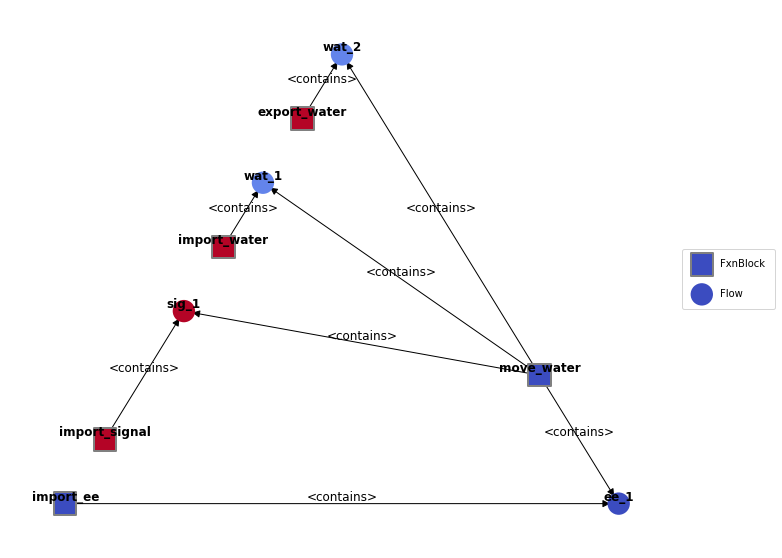

In [58]:
from fmdtools.analyze.graph import ModelGraph
mg = ModelGraph(mdl)
mg.set_heatmap(exp)
mg.draw()

## Save/Load

In detailed simulations, running a lot of computational simulations can take a considerable amount of time. As a result, it becomes impractical to run a new simulation every time one wishes to analyse its data. Results from fmdtools simulations (endclasses or mdlhists) can be saved as pickle, csv, or json files in this instance using either:
- `Result.save` or `History.save` or 
- passing a save_args dictionary to the respective propagate functions (e.g., {'endclass':{'filename':'file.pkl','overwrite':True})

and then loaded using:
- `Result.load` or `History.load`

In [59]:
mdlhists

import_ee_no_v_t27p0.i.finished: array(56)
import_ee_no_v_t27p0.i.on:     array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v

This saves a history to a file:

In [60]:
mdlhists.save("example_mdlhist.pkl", overwrite=True)

File already exists: example_mdlhist.pkl, writing anyway...


And this loads this history:

In [61]:
mdlhists_saved  = an.result.History.load("example_mdlhist.pkl")

In [62]:
mdlhists_saved 

import_ee_no_v_t27p0.i.finished: array(56)
import_ee_no_v_t27p0.i.on:     array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v_t27p0           array(56)
import_ee_no_v

Note that there are different trade-offs to using different file formats:
- `pickle` is a serialization format, and is thus very fast, but not human-readable. It is also not very secure, and **not recommended for files which will be passed on a network**
- `csv` outputs as comma separated values, which are slower and less robust (in terms of data types), but are human-readable and can be opened in a spreadsheet software like excel.
- `json` is similar to csv, but is less human readable.